In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lorenz_attractor import simulate_lorenz
from entropy import cohen_procaccia_entropy, time_delay_embedding

In [16]:
t_span = (0, 100)
initial_conditions = [0, 1, 1.05]
dt = 0.01

In [17]:
t, xyz = simulate_lorenz(t_span, initial_conditions, dt)
series = xyz[:, 0]  # Use the x-component for entropy calculation
print(t.shape)

(10000,)


In [22]:
 # Entropy parameters
m = 5  # Embedding dimension
tau = 1  # Time delay
# We calculate the entropy for a range of epsilon values
epsilons = np.logspace(-2, 1, 20)
entropies = []

In [23]:
print(f"Calculating Cohen-Procaccia entropy for m={m}, tau={tau}")
for epsilon in epsilons:
    h = cohen_procaccia_entropy(series, m, tau, epsilon)
    entropies.append(h)
    print(f"epsilon={epsilon:.4f}, h(epsilon, tau)={h:.4f}")


Calculating Cohen-Procaccia entropy for m=5, tau=1
epsilon=0.0100, h(epsilon, tau)=0.0130
epsilon=0.0144, h(epsilon, tau)=0.0273
epsilon=0.0207, h(epsilon, tau)=0.0520
epsilon=0.0298, h(epsilon, tau)=0.0850
epsilon=0.0428, h(epsilon, tau)=0.1267
epsilon=0.0616, h(epsilon, tau)=0.1566
epsilon=0.0886, h(epsilon, tau)=0.1723
epsilon=0.1274, h(epsilon, tau)=0.1790
epsilon=0.1833, h(epsilon, tau)=0.1788
epsilon=0.2637, h(epsilon, tau)=0.1726
epsilon=0.3793, h(epsilon, tau)=0.1647
epsilon=0.5456, h(epsilon, tau)=0.1546
epsilon=0.7848, h(epsilon, tau)=0.1454
epsilon=1.1288, h(epsilon, tau)=0.1346
epsilon=1.6238, h(epsilon, tau)=0.1204
epsilon=2.3357, h(epsilon, tau)=0.1025
epsilon=3.3598, h(epsilon, tau)=0.0795
epsilon=4.8329, h(epsilon, tau)=0.0533
epsilon=6.9519, h(epsilon, tau)=0.0347
epsilon=10.0000, h(epsilon, tau)=0.0217


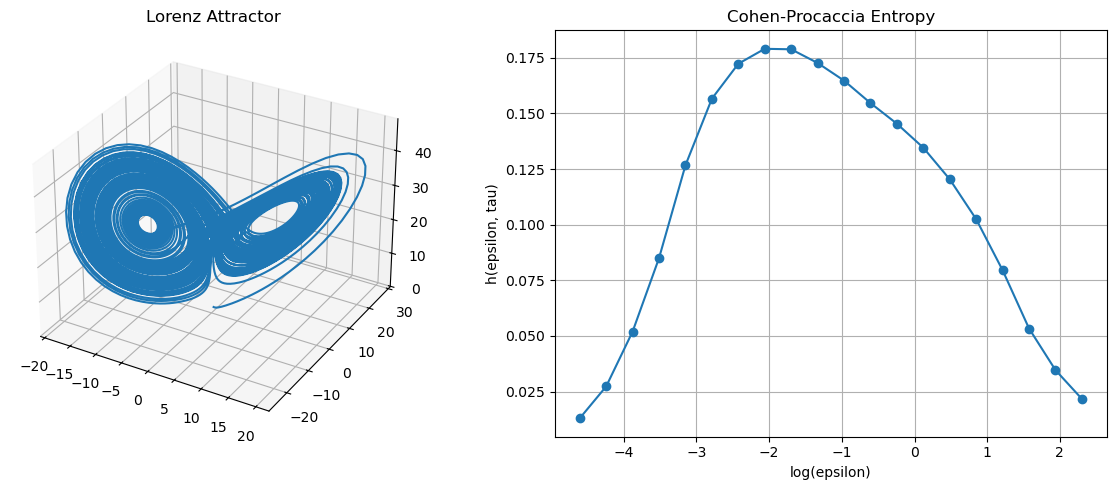

In [25]:
 # You can uncomment this section to plot the results

plt.figure(figsize=(12, 5))
# Plot Lorenz attractor
plt.subplot(1, 2, 1, projection='3d')
plt.plot(xyz[:, 0], xyz[:, 1], xyz[:, 2])
plt.title("Lorenz Attractor")
# Plot entropy vs epsilon
plt.subplot(1, 2, 2)
plt.plot(np.log(epsilons), entropies, 'o-')
plt.xlabel("log(epsilon)")
plt.ylabel("h(epsilon, tau)")
plt.title("Cohen-Procaccia Entropy")
plt.grid(True)
plt.tight_layout()
plt.show()